# Assignment 1: Approximation of mathematical functions 
### Due Date (22.4 - 12:00) 

<a id="gen_instructions"></a>
## Working on the assignment, todo and not todo:
<b><u>Todo</u></b>:<br />
<div class="alert alert-success">
<ul><li>&#x2714; <b> Work by yourself</b> and submit your own assignment, <b>no pairing</b> to other students</li>
<li>&#x2714; Test and save your assignment - <b>submit the last tested and saved version</b></li>
<li>&#x2714; to <b>submit</b> the assignment, download the notebook (File → Download .ipynb in Google Colab) and then upload the downloaded notebook</li>
<li>&#x2714; submit <b>only</b> the <b>notebook (.ipynb)</b> file</li>
<li>&#x2714; It is advisable to add extra cells to check your code implementation</li></ul>
</div>
<b><u>Not todo</u></b>:<br />
<div class="alert alert-danger">
<ul><li>&#x2718; do <b>NOT</b> submit an <b>empty assignment</b></li>
<li>&#x2718; do <b>NOT submit extra files</b>, <u>unless you're asked to do so</u></li>
<li>&#x2718; <b>Do NOT submit a .py/.txt/.rar/.zip (or any non (.ipynb) file)</b> <u>version for the notebook</u> of the assignment</li>
<li>&#x2718; <b>do NOT change</b> the notebook file name</li></ul>
</div>
<b><u>Not good - Any of the following</u></b>:<br/>
<div class="alert alert-danger">
<ul><li>&#x2718; Code not Implemented</li>
<li>&#x2718; No returned value</li>
<li>&#x2718; Did not remove the '<code>raise NotImplementedError()</code>' line</li></ul>
<code># --------------------------- (AFTER YOUR IMPLEMENTATION) RUN THIS CODE CELL  -------------------------------------
'''
What do you need to do?

Complete the 'method_to_implement' function to do something (some explanation ...) and
     return that value back
'''
def method_to_implement():
    # YOUR CODE HERE
    raise NotImplementedError()
</code></div>


In [ ]:
### import libraries
import math
import numpy
import matplotlib.pyplot as plt
from unittest.mock import patch
%matplotlib inline


## Question 1: Approximating $\log$

Function $\log$ is defined on positive real numbers: $\log(x): \mathcal{R}^+ \rightarrow \mathcal{R}$. The Taylor series for $\log$ has [the following form](https://en.wikipedia.org/wiki/Logarithm):

\begin{align}\log (x)  &= \frac{(x-1)^1}{1} - \frac{(x-1)^2}{2} + \frac{(x-1)^3}{3} - \frac{(x-1)^4}{4} + \cdots \\
&= \sum_{k=1}^\infty (-1)^{k+1}\frac{(x-1)^k}{k}
\end{align}
 


Q1.1 Implement `log1` that approximates $\log(x),\,0 < x < 2$.
<pre> 
computes log(x,n) with Taylor series approximation upto x^n
------------
Input parameters:
- x  - desired value to compute log of 
- n - number of series elements
------------
return value:
result of log(x)
------------
</pre>

In [ ]:
def log1(x, n):
    minusone_power = 1
    result = 0
    for i in range(1,n+1):
      result = result + (minusone_power*((x-1)**i))/i
      minusone_power=minusone_power*-1
    return result  
    

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.1 --- Test your implementation:
# ---------------------------
print ("Test 1 - Testing the implementation of the 'log1' function..\n ")
assert log1(0.5, 1) == -0.5 , 'Wrong answer , try implement diffrently'
print ("good job!\nTests passed - 'log1' function implementation , there may be hidden tests too")


Test 1 - Testing the implementation of the 'log1' function..
 
good job!
Tests passed - 'log1' function implementation , there may be hidden tests too


_Q1.2.A_<br> Plot  `numpy.log` and `log1` for $0 < x < 3$.  (use plot_fun function from the [lecture 2 notebook](https://colab.research.google.com/drive/1PAXmH_v6sQmbmAYrRK48eCfFQWLcQO3K))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


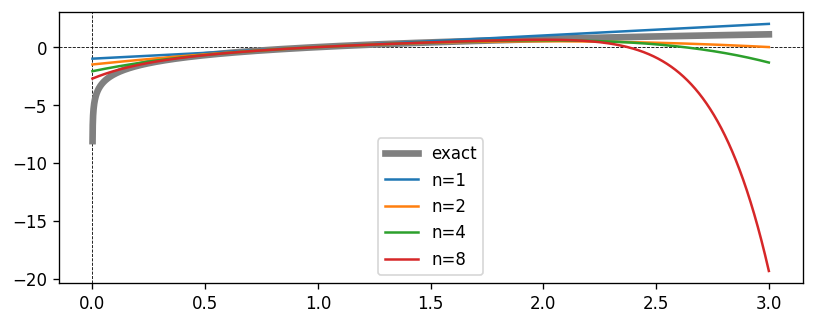

In [ ]:
# YOUR CODE HERE
def plot_fun(f, g, min=-5, max=5, logn_from=0, logn_till=4):
  """Plots approximate function f with a finite number of terms of Taylor
  series, and accurate function g for a range of arguments between min and max.
  f is plotted for numbers of Taylor series terms ranging exponentially from
  2**logn_from to 2**(logn_till-1), inclusive.
  Arguments:
     f - approximate function f(x, n) computing the value at x using n terms
        of Taylor series.
     g - accurate (practically exact) function g(x).
     min - minimum value of the range of arguments.
     max - maximum value of the range of arguments.
     logn_from - the smallest number of Taylor series terms is 2**logn_from.
     logn_till - the largets number of Taylor series terms is 2**(logn_till-1).
  """
  # Create a vector of 10000 values equally spaced between min and max.
  x=numpy.linspace(min, max, 10000)
  # Prepare a canvas for the graph.
  plt.figure(figsize=(8, 3)).set_dpi(120)
  # Plot axes x=0 and y=0, dashed.
  plt.axhline(0, ls='--', c='black', lw=0.5)
  plt.axvline(0, ls='--', c='black', lw=0.5)
  # Plot the 'exact' function.
  plt.plot(x, g(x), label="exact", c='gray', lw=4)
  # For each number of Taylor series terms ...
  for logn in range(logn_from, logn_till):
      n = 2**logn
      y = [f(x_, n) for x_ in x]
      # Plot the Taylor approximation
      plt.plot(x, y, label=f"n={n}")
  # Display the legend
  plt.legend()

plot_fun(log1, numpy.log, min=0, max=3)



_Q1.2B_<br> What is the maximum absolute error that you see in the graph?
Implement `maximum_absolute_error` that returns your answer.
<pre> 
------------
Input parameters:

nothing
------------
return value:

your answer as a float
------------
</pre>

In [81]:
def maximum_absolute_error():
    max_abs_err = 0.0
    for logn in range(4):
      n = 2**logn      
      for i in [0.5,1,1.5,2,2.5,3]: # samples
       if(max_abs_err<abs(numpy.log(i) - log1(i,n))):
        max_abs_err = abs(numpy.log(i) - log1(i,n))
         

    return float(max_abs_err) 
    

In [82]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.2.B --- Test your implementation:
# ---------------------------
print ("Test 2 - Testing the implementation of the 'maximum_absolute_error' function..\n ")
assert type(maximum_absolute_error()) is float ,"check that your return value is float"
print ("good job!\nTests passed - 'maximum_absolute_error' function implementation , there may be hidden tests too")


Test 2 - Testing the implementation of the 'maximum_absolute_error' function..
 
20.412898002953828
good job!
Tests passed - 'maximum_absolute_error' function implementation , there may be hidden tests too



_Q1.2C_<br> What is the maximum relative error that you see in the graph?
Implement `maximum_relative_error` that returns your answer.
<pre> 
------------
Input parameters:

nothing
------------
return value:

your answer as a float
------------
</pre>

In [ ]:
def maximum_relative_error():
     max_abs_err = 0.0
     sample_max = 0 # the sample which has the max absulote error
     for logn in range(4): # calculating the max absulote error
      n = 2**logn      
      for i in [0.5,1,1.5,2,2.5,3]: # samples
       if(max_abs_err<abs(numpy.log(i) - log1(i,n))):
        max_abs_err = abs(numpy.log(i) - log1(i,n))
        sample_max  = i
      return float(max_abs_err/numpy.log(sample_max)*100) # max relative error
    

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.2.C --- Test your implementation:
# ---------------------------
print ("Test 3 - Testing the implementation of the 'maximum_relative_error' function..\n ")
assert type(maximum_relative_error()) is float ,"check that your return value is float"
print ("good job!\nTests passed - 'maximum_relative_error' function implementation , there may be hidden tests too")


Test 3 - Testing the implementation of the 'maximum_relative_error' function..
 
good job!
Tests passed - 'maximum_relative_error' function implementation , there may be hidden tests too




Q1.3 <br>Implement `log2` that approximates $\log(x),\,0 < x <  \infty$.    _Hint:_ $\log (e^N\cdot x) = N + \log x$.

computes log(x,n) with Taylor series approximation upto x^n 
<pre> 
------------
Input parameters:
- x  - desired value to compute log of 
- n - number of series elements
------------
return value:
result of log(x)
------------
</pre>

In [ ]:
def log2(x,n):
    e = math.e
    e_power_N = 1 # e^0=1
    N = 0
    while(x>e_power_N):
      e_power_N = e_power_N * e
      N = N + 1
    y = x/e_power_N
    return N + log1(y,n) 
    

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.3 --- Test your implementation:
# ---------------------------
print ("Test 4 - Testing the implementation of the 'log2' function..\n ")
assert log2(0.5, 1) == -0.5 , 'Wrong answer , try implement diffrently'
assert log2(math.e, 2) == 1 , 'Wrong answer , try implement diffrently'
print ("good job!\nTests passed - 'log2' function implementation , there may be hidden tests too")


Test 4 - Testing the implementation of the 'log2' function..
 
good job!
Tests passed - 'log2' function implementation , there may be hidden tests too


_Q1.4A._ <br>Plot `math.log` and `log2` for $0.5 < x < 50$.  (use plot_fun function from the [lecture 2 notebook](https://colab.research.google.com/drive/1PAXmH_v6sQmbmAYrRK48eCfFQWLcQO3K))

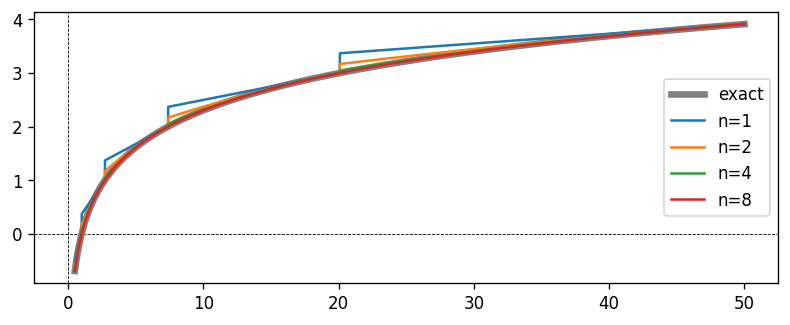

In [ ]:
def plot_fun(f, g, min=-5, max=5, logn_from=0, logn_till=4):
  """Plots approximate function f with a finite number of terms of Taylor
  series, and accurate function g for a range of arguments between min and max.
  f is plotted for numbers of Taylor series terms ranging exponentially from
  2**logn_from to 2**(logn_till-1), inclusive.
  Arguments:
     f - approximate function f(x, n) computing the value at x using n terms
        of Taylor series.
     g - accurate (practically exact) function g(x).
     min - minimum value of the range of arguments.
     max - maximum value of the range of arguments.
     logn_from - the smallest number of Taylor series terms is 2**logn_from.
     logn_till - the largets number of Taylor series terms is 2**(logn_till-1).
  """
  # Create a vector of 10000 values equally spaced between min and max.
  x=numpy.linspace(min, max, 10000)
  # Prepare a canvas for the graph.
  plt.figure(figsize=(8, 3)).set_dpi(120)
  # Plot axes x=0 and y=0, dashed.
  plt.axhline(0, ls='--', c='black', lw=0.5)
  plt.axvline(0, ls='--', c='black', lw=0.5)
  # Plot the 'exact' function.
  plt.plot(x, g(x), label="exact", c='gray', lw=4)
  # For each number of Taylor series terms ...
  for logn in range(logn_from, logn_till):
      n = 2**logn
      y = [f(x_, n) for x_ in x]
      # Plot the Taylor approximation
      plt.plot(x, y, label=f"n={n}")
  # Display the legend
  plt.legend()

plot_fun(log2, numpy.log, min=0.5, max=50)



_Q1.4B_ <br>What is the _absolute_ error of `log2` compared to `math.log` for x=3 , n=1?
Implement `absolute_error_31` that returns your answer.
<pre> 
------------
Input parameters:

nothing
------------
return value:

your answer as a float
------------
</pre>

In [ ]:
def absolute_error_31():
  return float(abs(log2(3,1) - numpy.log(3)))
    

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.4.B --- Test your implementation:
# ---------------------------
print ("Test 2 - Testing the implementation of the 'absolute_error_31' function..\n ")
assert type(absolute_error_31()) is float ,"check that your return value is float"
print ("good job!\nTests passed - 'absolute_error_31' function implementation , there may be hidden tests too")


Test 2 - Testing the implementation of the 'absolute_error_31' function..
 
good job!
Tests passed - 'absolute_error_31' function implementation , there may be hidden tests too



_Q1.4C_ <br>What is the _relative_ error of `log2` compared to `math.log` for x=3 , n=1?
Implement `relative_error_31` that returns your answer.
<pre> 
------------
Input parameters:

nothing
------------
return value:

your answer as a float
------------
</pre>

In [ ]:
def relative_error_31():
    return float(absolute_error_31()/numpy.log(3)*100)
    

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.4.C --- Test your implementation:
# ---------------------------
print ("Test 2 - Testing the implementation of the 'relative_error_31' function..\n ")
assert type(relative_error_31()) is float ,"check that your return value is float"
print ("good job!\nTests passed - 'relative_error_31' function implementation , there may be hidden tests too")


Test 2 - Testing the implementation of the 'relative_error_31' function..
 
good job!
Tests passed - 'relative_error_31' function implementation , there may be hidden tests too



_Q1.4D_ <br>What is the _absolute_ error of `log2` compared to `math.log` for x=3 , n=8?
Implement `absolute_error_38` that returns your answer.
<pre> 
------------
Input parameters:

nothing
------------
return value:

your answer as a float
------------
</pre>

In [ ]:
def absolute_error_38():
    return float(abs(log2(3,8) - numpy.log(3)))

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.4.D --- Test your implementation:
# ---------------------------
print ("Test 2 - Testing the implementation of the 'absolute_error_38' function..\n ")
assert type(absolute_error_38()) is float ,"check that your return value is float"
print ("good job!\nTests passed - 'absolute_error_38' function implementation , there may be hidden tests too")


Test 2 - Testing the implementation of the 'absolute_error_38' function..
 
good job!
Tests passed - 'absolute_error_38' function implementation , there may be hidden tests too



_Q1.4E_ <br>What is the _absolute_ error of `log2` compared to `math.log` for x=39 , n=1?
Implement `absolute_error_391` that returns your answer.
<pre> 
------------
Input parameters:

nothing
------------
return value:

your answer as a float
------------
</pre>

In [ ]:
def absolute_error_391():
    return float(abs(log2(39,1) - numpy.log(39)))

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.4.E --- Test your implementation:
# ---------------------------
print ("Test 2 - Testing the implementation of the 'absolute_error_391' function..\n ")
assert type(absolute_error_391()) is float ,"check that your return value is float"
print ("good job!\nTests passed - 'absolute_error_391' function implementation , there may be hidden tests too")


Test 2 - Testing the implementation of the 'absolute_error_391' function..
 
good job!
Tests passed - 'absolute_error_391' function implementation , there may be hidden tests too


_Q1.4F_<br> What is the _relative_ error of `log2` compared to `math.log` for x=39 , n=1?
Implement `relative_error_391` that returns your answer.
<pre> 
------------
Input parameters:

nothing
------------
return value:

your answer as a float
------------
</pre>

In [ ]:
def relative_error_391():
    return float(absolute_error_391()/numpy.log(39)*100)

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.4.F --- Test your implementation:
# ---------------------------
print ("Test 2 - Testing the implementation of the 'relative_error_391' function..\n ")
assert type(relative_error_391()) is float ,"check that your return value is float"
print ("good job!\nTests passed - 'relative_error_391' function implementation , there may be hidden tests too")


Test 2 - Testing the implementation of the 'relative_error_391' function..
 
good job!
Tests passed - 'relative_error_391' function implementation , there may be hidden tests too


## Question 2: Using approximate versions of  $\log$ and $\exp$


Q2.1A <br>Implement "logfact2" $$\log n! = \sum_{i=1}^n \log i$$ (similar to : [lecture 1 notebook](https://colab.research.google.com/drive/1PS2XZEKAhsV7Wq97Szk1RH93HWuhTyYF).)

Use 'log2' from question 1 to implement logfact function 
<pre> 
------------
Input parameters:
- n - Factorial 
- p - numbers of Taylor series (for log2)
------------
return value:
- logf - log(n!)
------------
</pre>

In [ ]:
def logfact2(n,p):
    result = 0
    for i in range(1,n+1):
     result = result + log2(i,p)
    return result

Q2.1B <br>Implement "logfact1" $$\log n! = \sum_{i=1}^n \log i$$

Use 'math.log' to implement it
<pre> 
------------
Input parameters:
- n - Factorial
------------
return value:
- logf - log(n!)
------------
</pre>

In [ ]:
def logfact1(n):
    result = 0
    for i in range(1,n+1):
     result = result + math.log(i)
    return result

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.1 --- Test your implementation:
# ---------------------------
print ("Testing the implementation of the 'logfact2'/'logfact1' function..\n ")
assert logfact2(1,1)== log2(1 ,1) ,"check your implementation "
print ("good job!\nTests passed - 'logfact2' function implementation , there may be hidden tests too")


Testing the implementation of the 'logfact2'/'logfact1' function..
 
good job!
Tests passed - 'logfact2' function implementation , there may be hidden tests too


Q2.2A <br>Implement "binom1"

Use 'logfact1' and math.exp to compute number of permutations
<pre> 
------------
Input parameters:
- n - number of elements 
- k - subsets size 
------------
return value:
- permutations - number of subsets of size 'k' in n elements (natural number)
------------
</pre>

In [ ]:
def binom1(n,k):
   return round(math.exp(logfact1(n)-(logfact1(n-k)+logfact1(k)))) 


Q2.2B <br>Implement "binom2"

Use 'logfact2' and exp2 from [lecture 1 notebook](https://colab.research.google.com/drive/1-UKYN6p63tcqhPUg2TAUMsaJz0hUv1x0?usp=sharing) notebook to implement approximate computation of the number of subsets of a set ( functions `logfact` and `binom` in the [lecture 0 notebook](https://colab.research.google.com/drive/1D7cfVERYF4oA9tYW46b8TAbEpD1RJ8ow?usp=sharing. )

<pre> 
------------
Input parameters:
- n - number of elements 
- k - subsets size 
- p - numbers of Taylor series
------------
return value:
- permutations - number of subsets of size 'k' in n elements (natural number)
------------
</pre>

In [ ]:
def exp(x, n): #exp from lec 1
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v    # return the result

In [ ]:
def exp2(x, n): #exp2 from lec 2
  e = 2.718281828459045
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
                   # of the fractional part
  return v

In [ ]:

def binom2(n,k,p):
 return round(exp2((logfact2(n,p)-(logfact2(n-k,p)+logfact2(k,p))),p))


In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.2 --- Test your implementation:
# ---------------------------

print ("Testing the implementation of the 'binom1'/'binom2' function..\n ")
assert binom2(4,3,1)==  4,"check your implementation "
print ("good job!\nTests passed - 'binom1'/'binom2' function implementation , there may be hidden tests too")


Testing the implementation of the 'binom1'/'binom2' function..
 
good job!
Tests passed - 'binom1'/'binom2' function implementation , there may be hidden tests too


_Q2.3_<br>Compare values and the running times of : <br>
`binom2` using ---> `log2` and `exp2` <br>
vs <br>
`binom` using --> `math.log` and `math.exp`.<br>
with the values : <br>
`(1, 1)`, `(4, 3)`, and `(1000, 10)`.

In [ ]:
print("binom1 results:")
%time print("1 out of 1 = %d" % binom1(1, 1))
%time print("3 out of 4  = %d" % binom1(4, 3))
%time print("10 out of 1000 = %d" % binom1(1000, 10))
print("binom2 results:")
%time print("1 out of 1 = %d" % binom2(1, 1,5))
%time print("3 out of 4  = %d" % binom2(4, 3,5))
%time print("10 out of 1000 = %d" % binom2(1000, 10,5))

binom1 results:
1 out of 1 = 1
CPU times: user 503 µs, sys: 0 ns, total: 503 µs
Wall time: 678 µs
3 out of 4  = 4
CPU times: user 496 µs, sys: 0 ns, total: 496 µs
Wall time: 639 µs
10 out of 1000 = 263409560461767849541632
CPU times: user 1.14 ms, sys: 22 µs, total: 1.16 ms
Wall time: 1.28 ms
binom2 results:
1 out of 1 = 1
CPU times: user 439 µs, sys: 0 ns, total: 439 µs
Wall time: 444 µs
3 out of 4  = 4
CPU times: user 489 µs, sys: 0 ns, total: 489 µs
Wall time: 593 µs
10 out of 1000 = 250833147237418097704960
CPU times: user 9 ms, sys: 599 µs, total: 9.6 ms
Wall time: 11 ms


_Q2.4A_ What are the _relative_ error of `binom2` with 10 Taylor series terms for `comb(1,1)`
Implement `relative_error_1_1` that returns your answer.
<pre> 
------------
Input parameters:

nothing
------------
return value:

your answer as a float
------------
</pre>

In [ ]:
def fact(n): #comb from lec 0
  fct = 1
  for i in range(n):
    fct *= i+1
  return fct

def comb(n, k):
  return fact(n)//(fact(k)*fact(n - k))

In [ ]:
def relative_error_1_1():
    return float(abs(binom2(1,1,10)-comb(1,1))/comb(1,1)*100)

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.4A --- Test your implementation:
# ---------------------------
print ("Test 2 - Testing the implementation of the 'relative_error_1_1' function..\n ")
assert type(relative_error_1_1()) is float ,"check that your return value is float"
print ("good job!\nTests passed - 'relative_error_1_1' function implementation , there may be hidden tests too")


Test 2 - Testing the implementation of the 'relative_error_1_1' function..
 
good job!
Tests passed - 'relative_error_1_1' function implementation , there may be hidden tests too


_Q2.4B_<br> What are the _relative_ error of `binom2` with 10 Taylor series terms for `comb(4, 3)`
Implement `relative_error_4_3` that returns your answer.
<pre> 
------------
Input parameters:

nothing
------------
return value:

your answer as a float
------------
</pre>

In [ ]:
def relative_error_4_3():
    return float(abs((binom2(4,3,10)-comb(4,3)))/comb(4,3)*100)

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.4B --- Test your implementation:
# ---------------------------
print ("Testing the implementation of the 'relative_error_4_3' function..\n ")
assert type(relative_error_4_3()) is float ,"check that your return value is float"
print ("good job!\nTests passed - 'relative_error_4_3' function implementation , there may be hidden tests too")


Testing the implementation of the 'relative_error_4_3' function..
 
0.0
good job!
Tests passed - 'relative_error_4_3' function implementation , there may be hidden tests too


_Q2.4C_<br> What are the _relative_ error of `binom2` with 10 Taylor series terms for `comb(1000, 10)`
Implement `relative_error_1000_10` that returns your answer.
<pre> 
------------
Input parameters:

nothing
------------
return value:

your answer as a float
------------
</pre>

In [ ]:
def relative_error_1000_10():
     return float(abs((binom2(1000,10,10)-comb(1000,10)))/comb(1000,10)*100)

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# _Q2.4C_ --- Test your implementation:
# ---------------------------
print ("Testing the implementation of the 'relative_error_1000_10' function..\n ")
assert type(relative_error_1000_10()) is float ,"check that your return value is float"
print ("good job!\nTests passed - 'relative_error_1000_10' function implementation , there may be hidden tests too")


Testing the implementation of the 'relative_error_1000_10' function..
 
0.0018032351782977366
good job!
Tests passed - 'relative_error_1000_10' function implementation , there may be hidden tests too


_Q2.5_<br> What is the minimal number of Taylor series terms in `binom2` that required to get to error of 0.03% with `comb(1000,10)` from [lecture 0 notebook](https://colab.research.google.com/drive/1D7cfVERYF4oA9tYW46b8TAbEpD1RJ8ow?usp=sharing).?<br>
Implement `Q2_5_answer` function that returns your answer.
<pre> 
------------
Input parameters:

nothing
------------
return value:

your answer as an int
------------
</pre>

In [ ]:
def Q2_5_answer():
   answer = 1
   while(abs((binom2(1000,10,answer)-comb(1000,10)))/comb(1000,10)*100>=0.03):
    answer = answer + 1 
   return answer
    

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.5 --- Test your implementation:
# ---------------------------
Q2_5_answer()
print ("------hidden tests cell------")

13
------hidden tests cell------
